#### Import important libraries

In [204]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import metrics, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (confusion_matrix, classification_report, 
                             accuracy_score, precision_score, recall_score, f1_score)

import warnings
warnings.filterwarnings("ignore")  # ignore warnings

%matplotlib inline
sns.set()
sns.set(style="white")
sns.set(style="whitegrid",color_codes = True)

##### Load the dataset

In [205]:
data = pd.read_csv("Loan_Modelling.csv")
data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


#### Exploratory Data Analysis

In [206]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [207]:
data.shape # check the size of data

(5000, 14)

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [209]:
data.dtypes # check the data types

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [210]:
#Checking for row duplication in the dataset
data.duplicated().sum()



0

In [211]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [212]:
data.isnull().sum()# check for missing value

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- there are no missing value from the total missing value count of each column 

In [213]:
# to check for any missing value at all
data.isnull().values.any()

False

- The false implies there are no missing values in the dataset.

In [214]:
# check for unique data
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

- I can see that the dataset has unique values in each column.

In [215]:
#Performing descriptive statistics on the dataset
data.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- Each column in the data looks all cleaned except for the column **Experience** has a negative value -3 which could possibly be a mistake as experience can not be negative. '

<Figure size 1280x960 with 0 Axes>

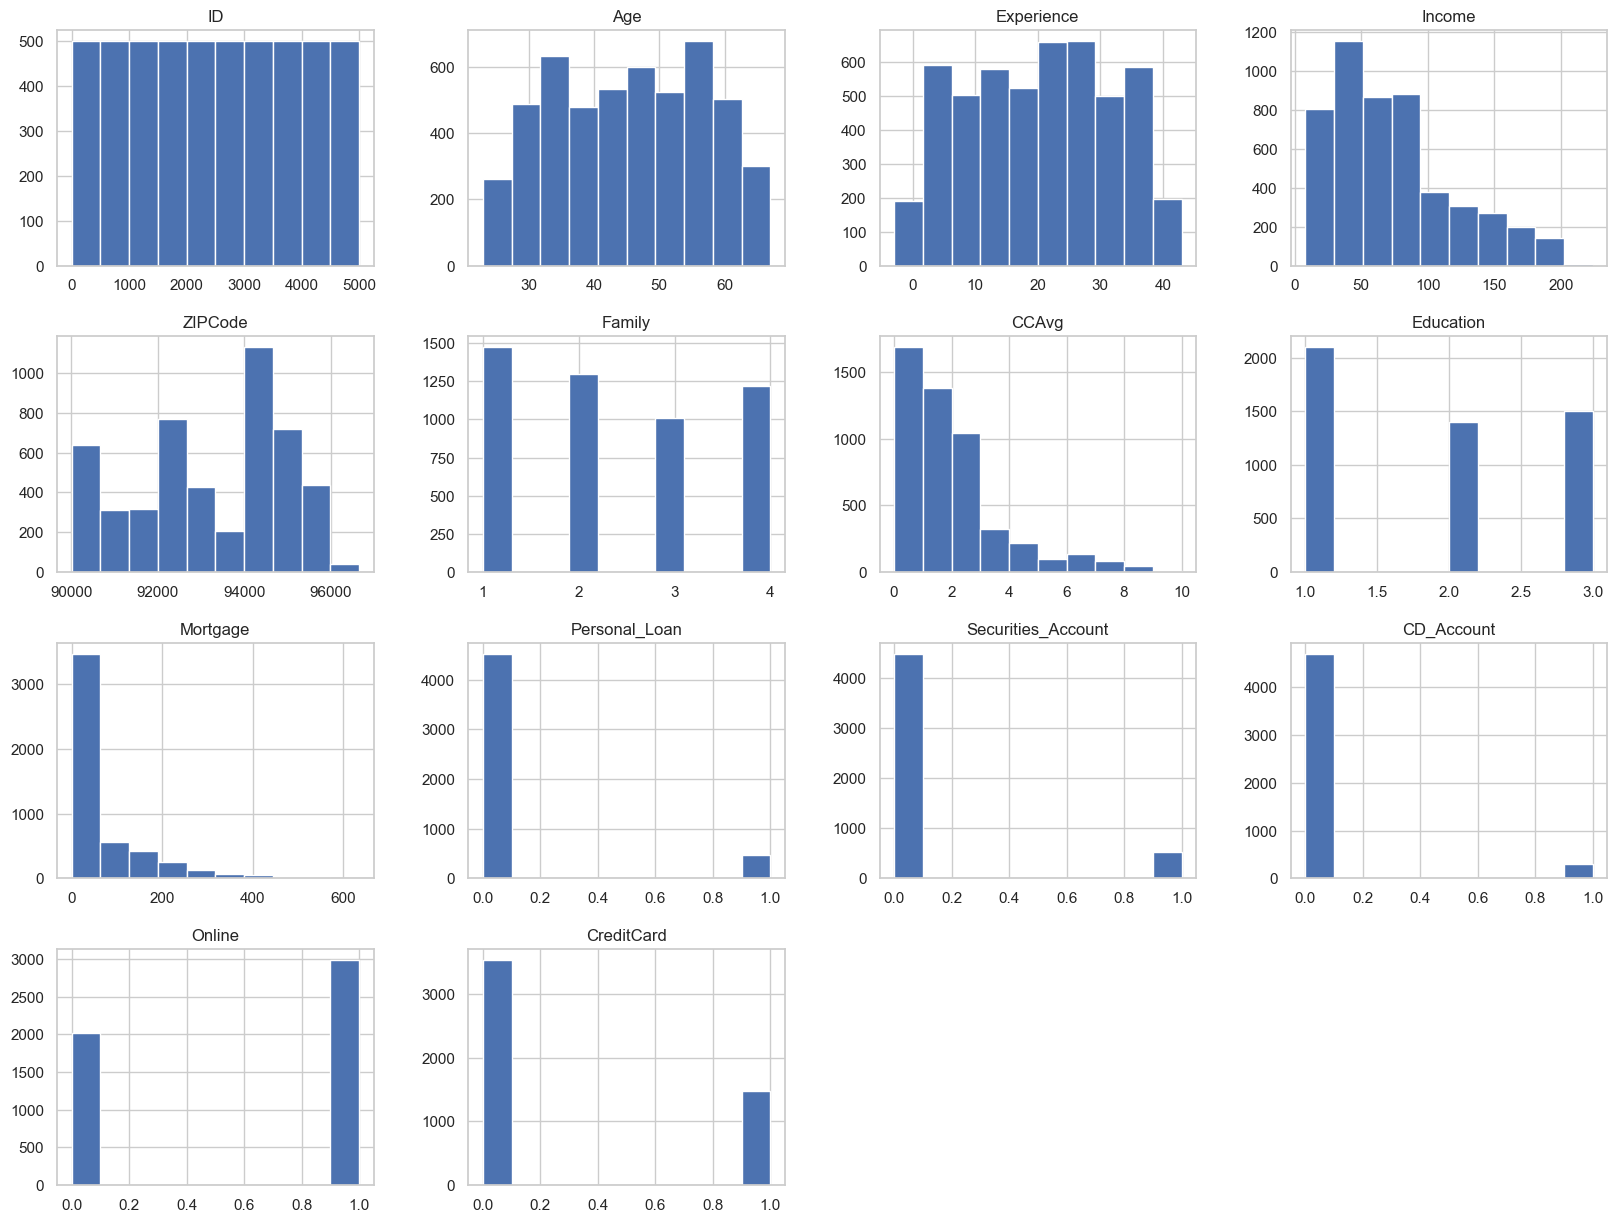

In [216]:
#fig, ax = plt.subplots(nrows=3, ncols=3, sharey = False) 
#data.plot(kind = 'hist', subplots = True, sharex = False, sharey = False, figsize=(15,20) ) 
plt.figure(dpi=200) 
data.hist(figsize = (20,15)) 
plt.show() 
#plt.subplots_adjust(wspace = 0.5, hspace = 0.5) 

- I can see that income, ccavg and mortgage are rightly skewed.

In [217]:
def histogram_boxplot(feature, figsize=(15, 7), bins=None):
    """ 
    Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15,10))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='yellow') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=True, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='blue', linestyle='-');# Add median to the histogram

In [218]:
def create_outliers(feature: str, data=data):
    """ 
    Returns dataframe object of feature outliers.
    feature: 1-d feature array
    data: pandas dataframe (default is data)
    """
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    #print(((df.Mileage < (Q1 - 1.5 * IQR)) | (df.Mileage > (Q3 + 1.5 * IQR))).sum())
    return data[((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

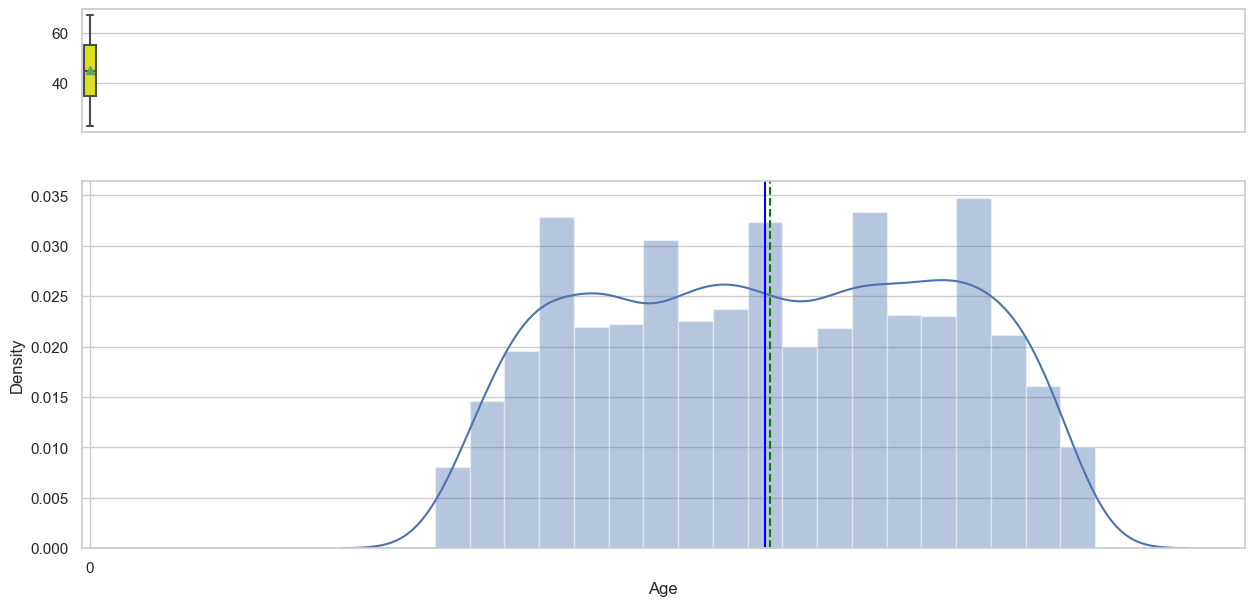

In [219]:
histogram_boxplot(data.Age)

- There are no outliers in the age column. The mean is near the median.
- Average age is about 45 years old.
- The plot shows the distribution is uniform.

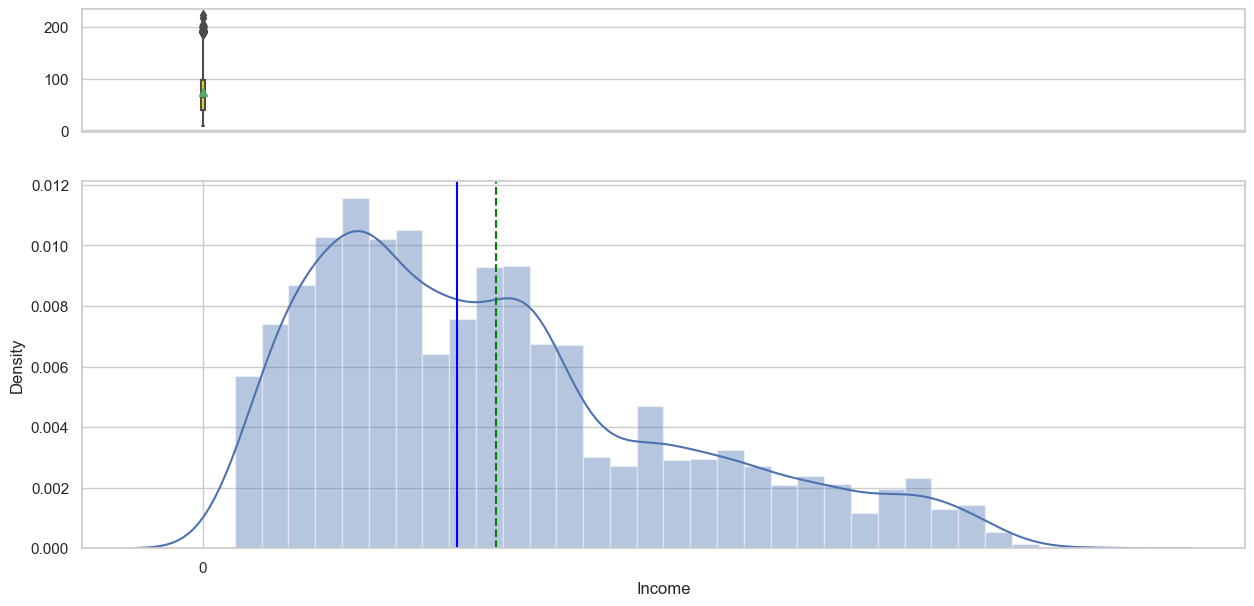

In [220]:
histogram_boxplot(data.Income)

- The average income is about 60K, with a median value of about 70K.
- income column is right skewed and has many outliers.

In [221]:
outliers = create_outliers('Income')
outliers.sort_values(by='Income', ascending=False).head(20)


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3896,3897,48,24,224,93940,2,6.67,1,0,0,0,1,1,1
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
526,527,26,2,205,93106,1,6.33,1,271,0,0,0,0,1
2988,2989,46,21,205,95762,2,8.80,1,181,0,1,0,1,0
4225,4226,43,18,204,91902,2,8.80,1,0,0,0,0,1,0
677,678,46,21,204,92780,2,2.80,1,0,0,0,0,1,0
2278,2279,30,4,204,91107,2,4.50,1,0,0,0,0,1,0
3804,3805,47,22,203,95842,2,8.80,1,0,0,0,0,1,0
2101,2102,35,5,203,95032,1,10.00,3,0,1,0,0,0,0
787,788,45,15,202,91380,3,10.00,3,0,1,0,0,0,0


In [222]:
print(f"There are {outliers.shape[0]} outliers.")

There are 96 outliers.


- there are a total of 96 outliers in the income column

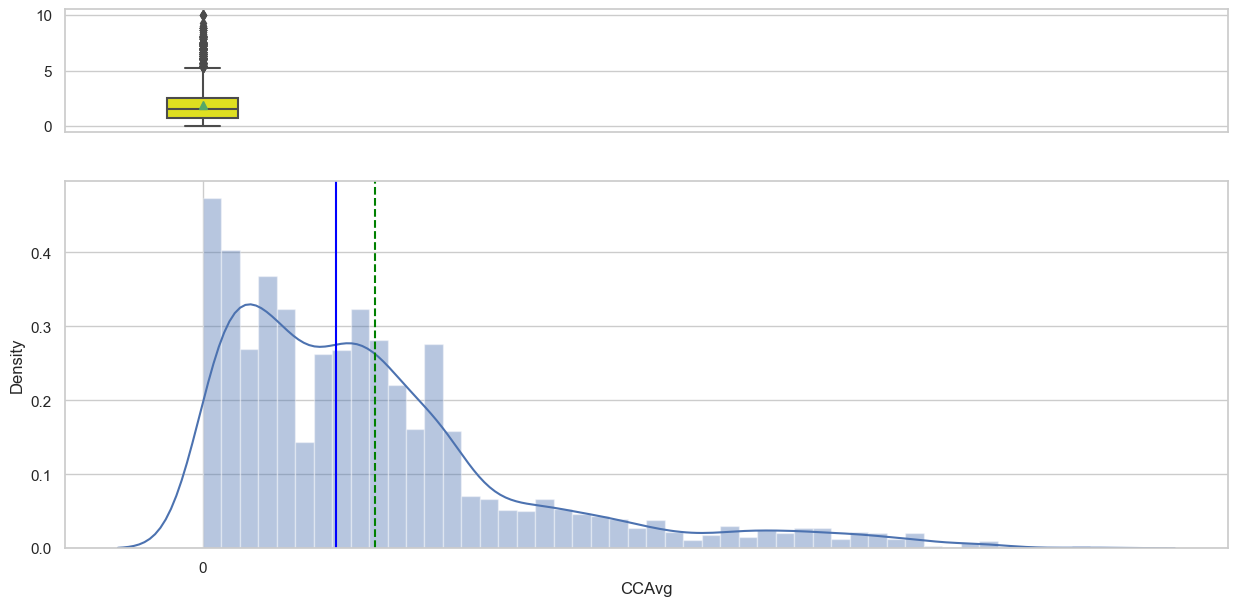

In [223]:
histogram_boxplot(data.CCAvg)

- CCAvg has an average of about 1.5 and a median of about 2.
- CCAvg column is right skewed and has many outliers to the upside.

In [224]:
outliers = create_outliers('CCAvg')
outliers.sort_values(by='CCAvg', ascending=False).head(20)


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2337,2338,43,16,201,95054,1,10.0,2,0,1,0,0,0,1
787,788,45,15,202,91380,3,10.0,3,0,1,0,0,0,0
2101,2102,35,5,203,95032,1,10.0,3,0,1,0,0,0,0
3943,3944,61,36,188,91360,1,9.3,2,0,1,0,0,0,0
3822,3823,63,33,178,91768,4,9.0,3,0,1,0,0,0,0
1339,1340,52,25,180,94545,2,9.0,2,297,1,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
1277,1278,45,20,194,92110,2,8.8,1,428,0,0,0,0,0
3312,3313,47,22,190,94550,2,8.8,1,0,0,0,0,0,0
4225,4226,43,18,204,91902,2,8.8,1,0,0,0,0,1,0


In [225]:
print(f"There are {outliers.shape[0]} outliers.")

There are 324 outliers.


- There are a total of 324 outliers in the CCAvg column

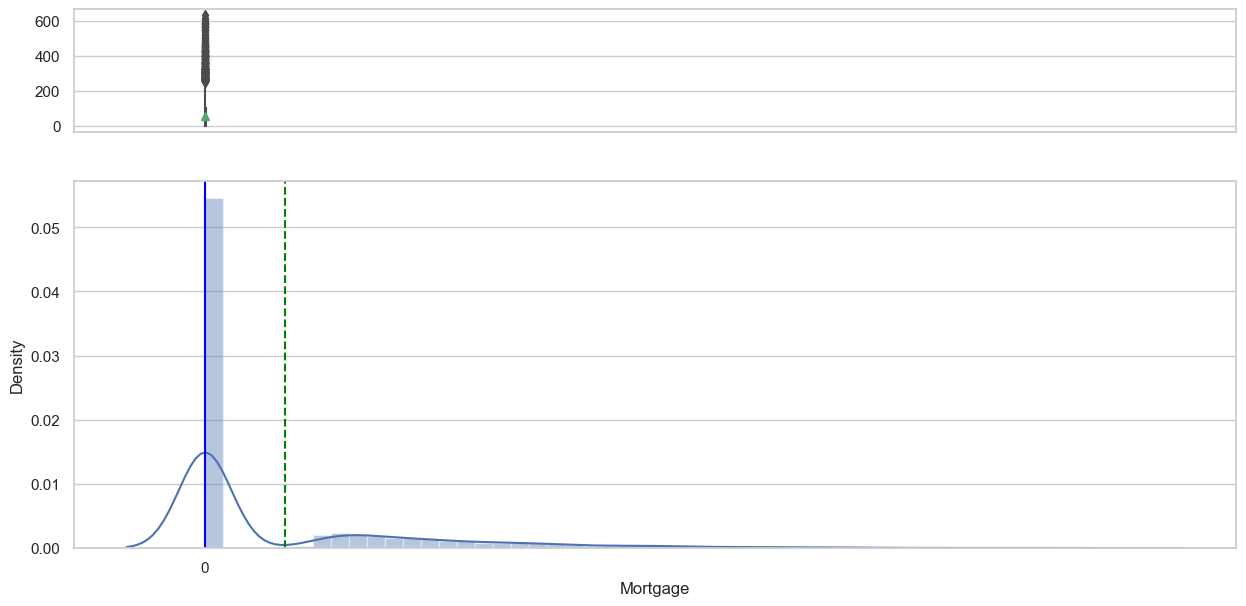

In [226]:
histogram_boxplot(data.Mortgage)


- Mortgage has many values that aren't null but are equal to zero.
- Mortgage column has many outliers to the upside

In [227]:
#Observations on mortgage outliers
outliers = create_outliers('Mortgage')
outliers.sort_values(by='Mortgage', ascending=False)



,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2934,2935,37,13,195,91763,2,6.5,1,635,0,0,0,1,0
303,304,49,25,195,95605,4,3.0,1,617,1,0,0,0,0
4812,4813,29,4,184,92126,4,2.2,3,612,1,0,0,1,0
1783,1784,53,27,192,94720,1,1.7,1,601,0,0,0,1,0
4842,4843,49,23,174,95449,3,4.6,2,590,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,1523,25,-1,101,94720,4,2.3,3,256,0,0,0,0,1
3950,3951,38,14,62,94143,1,1.5,3,255,0,0,0,1,0
2159,2160,61,35,99,94085,1,4.8,3,255,1,0,0,0,1
3138,3139,36,11,103,93555,1,4.6,1,255,0,0,0,1,0


In [228]:
print(f"There are {outliers.shape[0]} outliers in the outlier column.")

There are 291 outliers in the outlier column.


- there are a total of 291 outliers in the Mortgage column.

In [229]:
#Check zero values in mortgage column
print(f'There are {data[data.Mortgage==0].shape[0]} rows where Mortgage equals to ZERO!')

There are 3462 rows where Mortgage equals to ZERO!


- there are 3462 rows where Mortgage equals to Zero

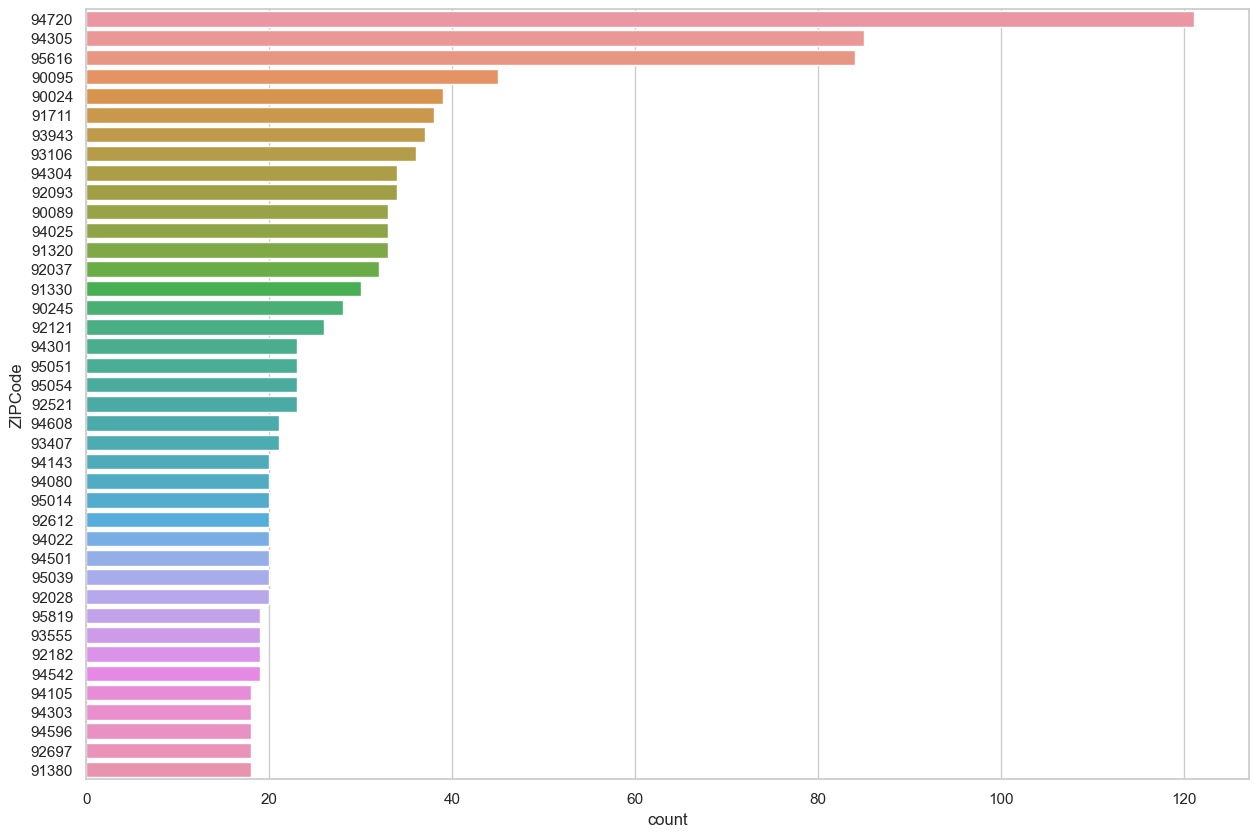

In [230]:
#Check the location where mortgage equals zero using zipcodes frequency.
plt.figure(figsize=(15, 10))
sns.countplot(y=data[data.Mortgage==0]['ZIPCode'], 
              data=data, 
              order=data[data.Mortgage==0]['ZIPCode'].value_counts().index[:40]);

- The zipcode 94720 has the most frequent number of mortgages that equal zero with over 120 values.
- The second highest number of zero values is 94305, and the third highest is 95616.

##### Visualizing Experience

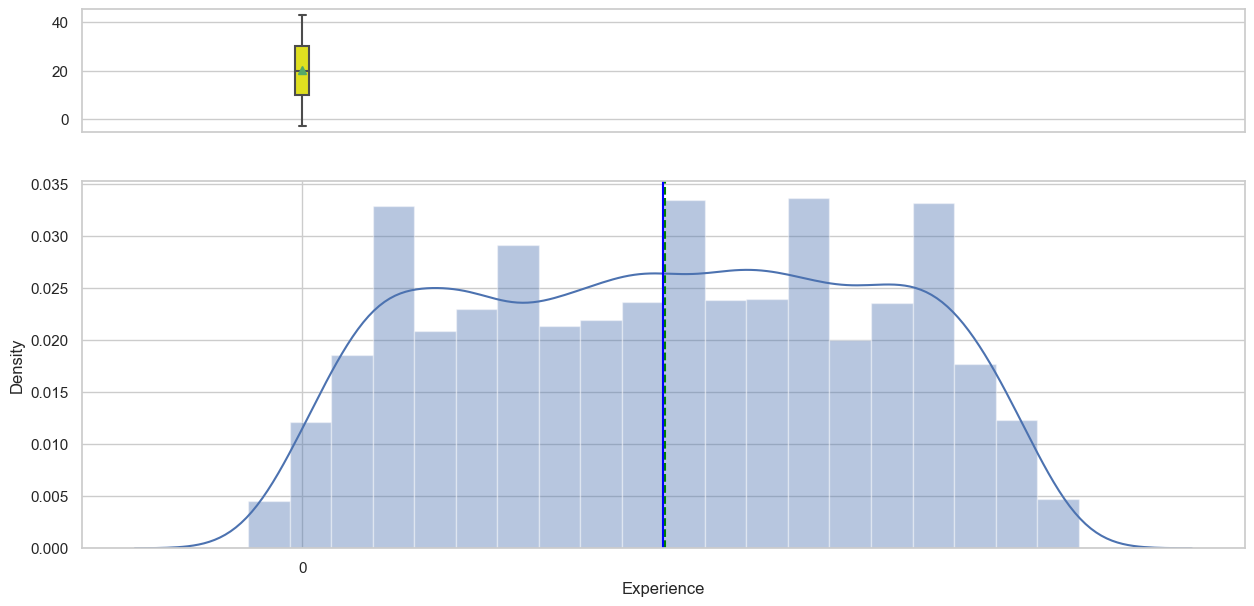

In [231]:
histogram_boxplot(data.Experience)

- The experience column has a uniform distribution and has no outliers.
- The average and median experience is about 20 years.
- The mean is close to the median.

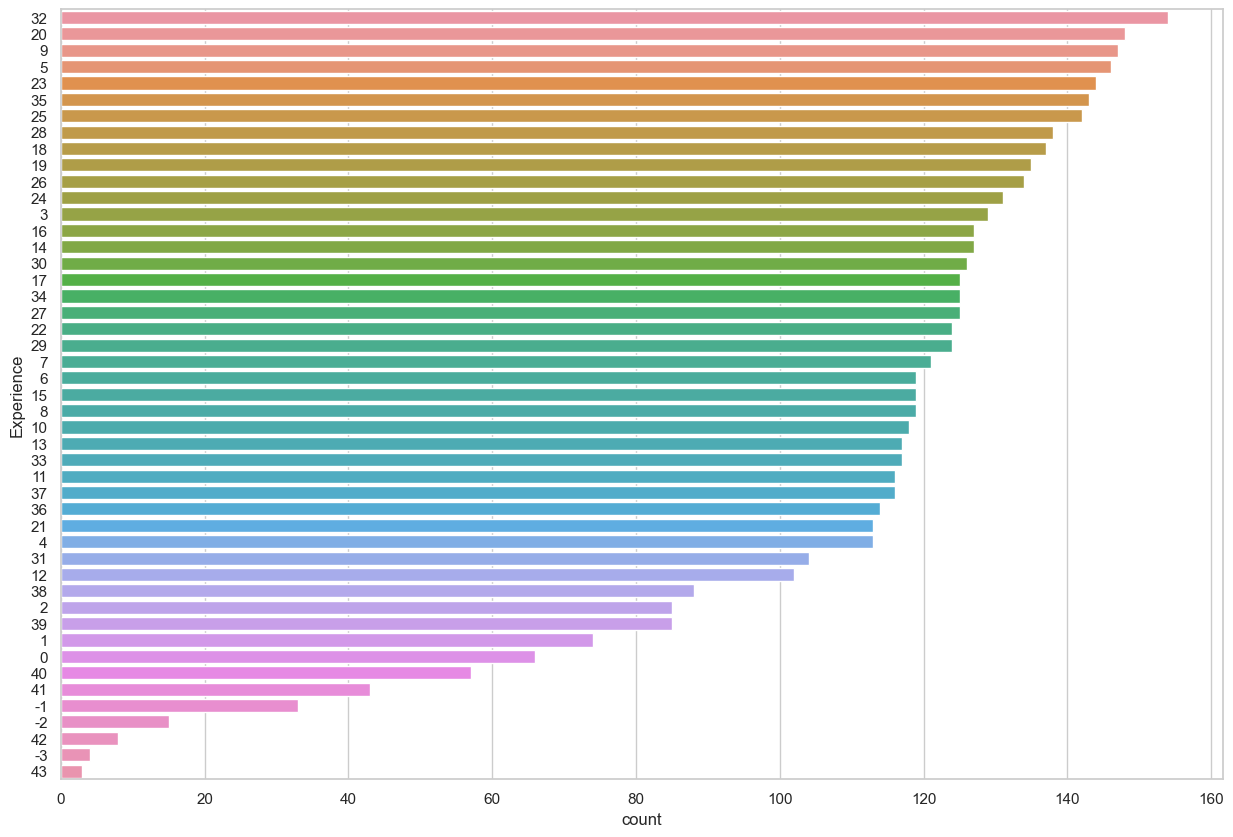

In [232]:
plt.figure(figsize=(15, 10))
sns.countplot(y=data.Experience, 
              data=data, 
              order=data.Experience.value_counts().index[:]);

- 32 years is the greatest number of experience years observed with about 150 observations.
- The plot shows negative values(-1, -2, -3).

In [233]:
print(f"There are {data[data.Experience<0].shape[0]} rows that have professional experience less than zero.")
data[data.Experience<0].sort_values(by='Experience', ascending=True).head()

There are 52 rows that have professional experience less than zero.


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4514,4515,24,-3,41,91768,4,1.0,3,0,0,0,0,1,0
2618,2619,23,-3,55,92704,3,2.4,2,145,0,0,0,1,0
4285,4286,23,-3,149,93555,2,7.2,1,0,0,0,0,1,0
3626,3627,24,-3,28,90089,4,1.0,3,0,0,0,0,0,0
2717,2718,23,-2,45,95422,4,0.6,2,0,0,0,0,1,1


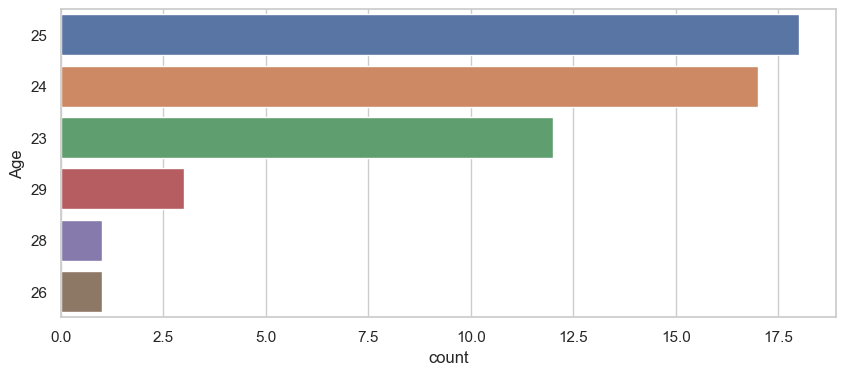

In [234]:
#Countplot for experience less than zero vs. age.
plt.figure(figsize=(10, 4))
sns.countplot(y=data[data.Experience<0]['Age'], 
              data=data, 
              order=data[data.Experience<0]['Age'].value_counts().index[:]);

- it shows most of the negative values are from the 25 year old age group with over 17 of them.
- This should be an error in the data entry because there can't be negative years of experience.
- Hence, will take the absolute value of the experience.

In [235]:
#Taking absolute values of the experience column
data['abs_Experience'] = np.abs(data.Experience)
data.sort_values(by='Experience', ascending=True).head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,abs_Experience
4514,4515,24,-3,41,91768,4,1.0,3,0,0,0,0,1,0,3
2618,2619,23,-3,55,92704,3,2.4,2,145,0,0,0,1,0,3
4285,4286,23,-3,149,93555,2,7.2,1,0,0,0,0,1,0,3
3626,3627,24,-3,28,90089,4,1.0,3,0,0,0,0,0,0,3
3796,3797,24,-2,50,94920,3,2.4,2,0,0,1,0,0,0,2
2717,2718,23,-2,45,95422,4,0.6,2,0,0,0,0,1,1,2
4481,4482,25,-2,35,95045,4,1.0,3,0,0,0,0,1,0,2
3887,3888,24,-2,118,92634,2,7.2,1,0,0,1,0,1,0,2
2876,2877,24,-2,80,91107,2,1.6,3,238,0,0,0,0,0,2
2962,2963,23,-2,81,91711,2,1.8,2,0,0,0,0,0,0,2


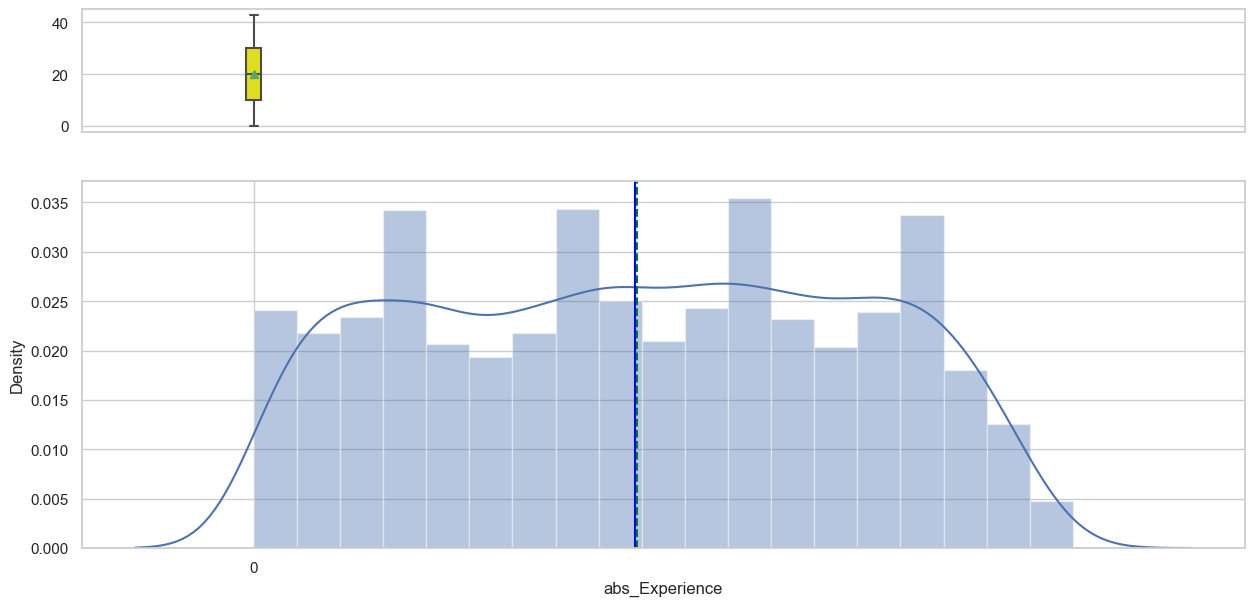

In [236]:
histogram_boxplot(data.abs_Experience)

- There are no much changes in the distribution.

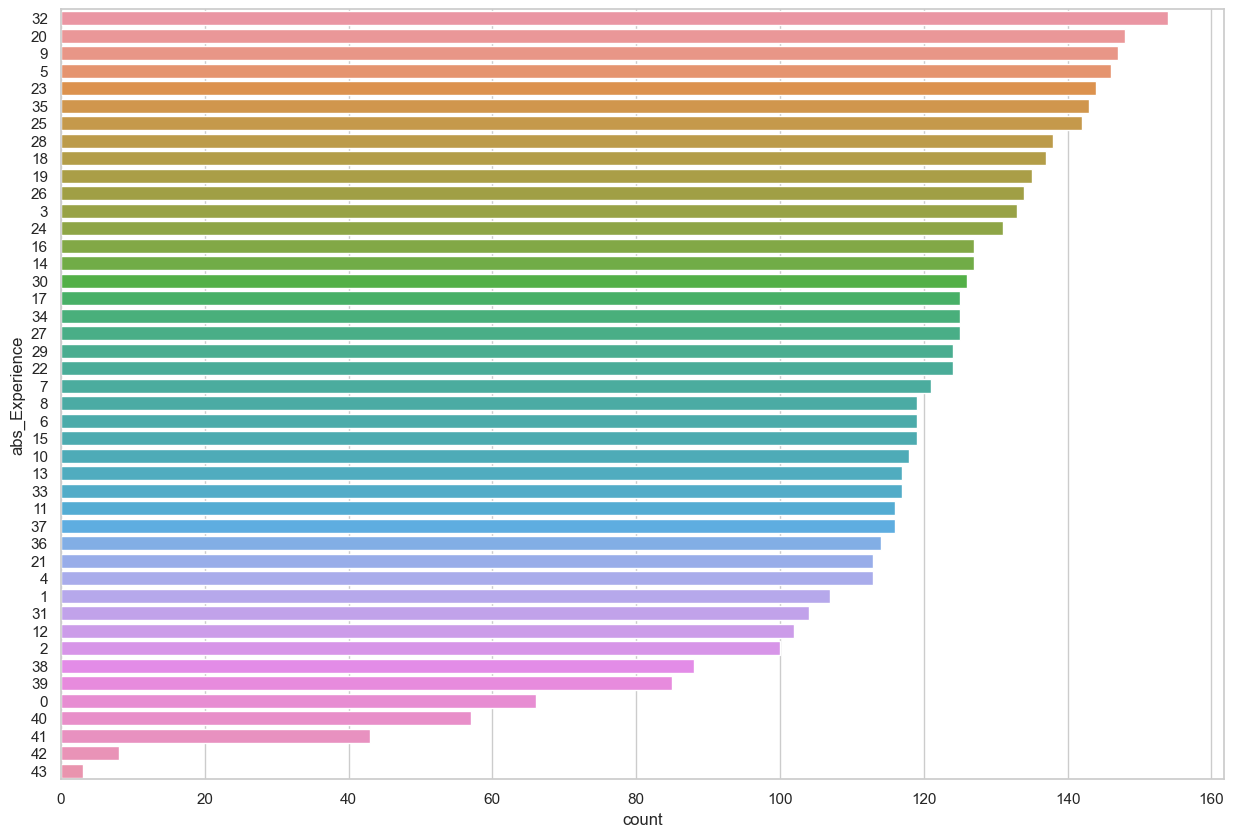

In [237]:
plt.figure(figsize=(15, 10))
sns.countplot(y=data.abs_Experience, 
              data=data, 
              order=data.abs_Experience.value_counts().index[:]);

-There are no more negative experience values.

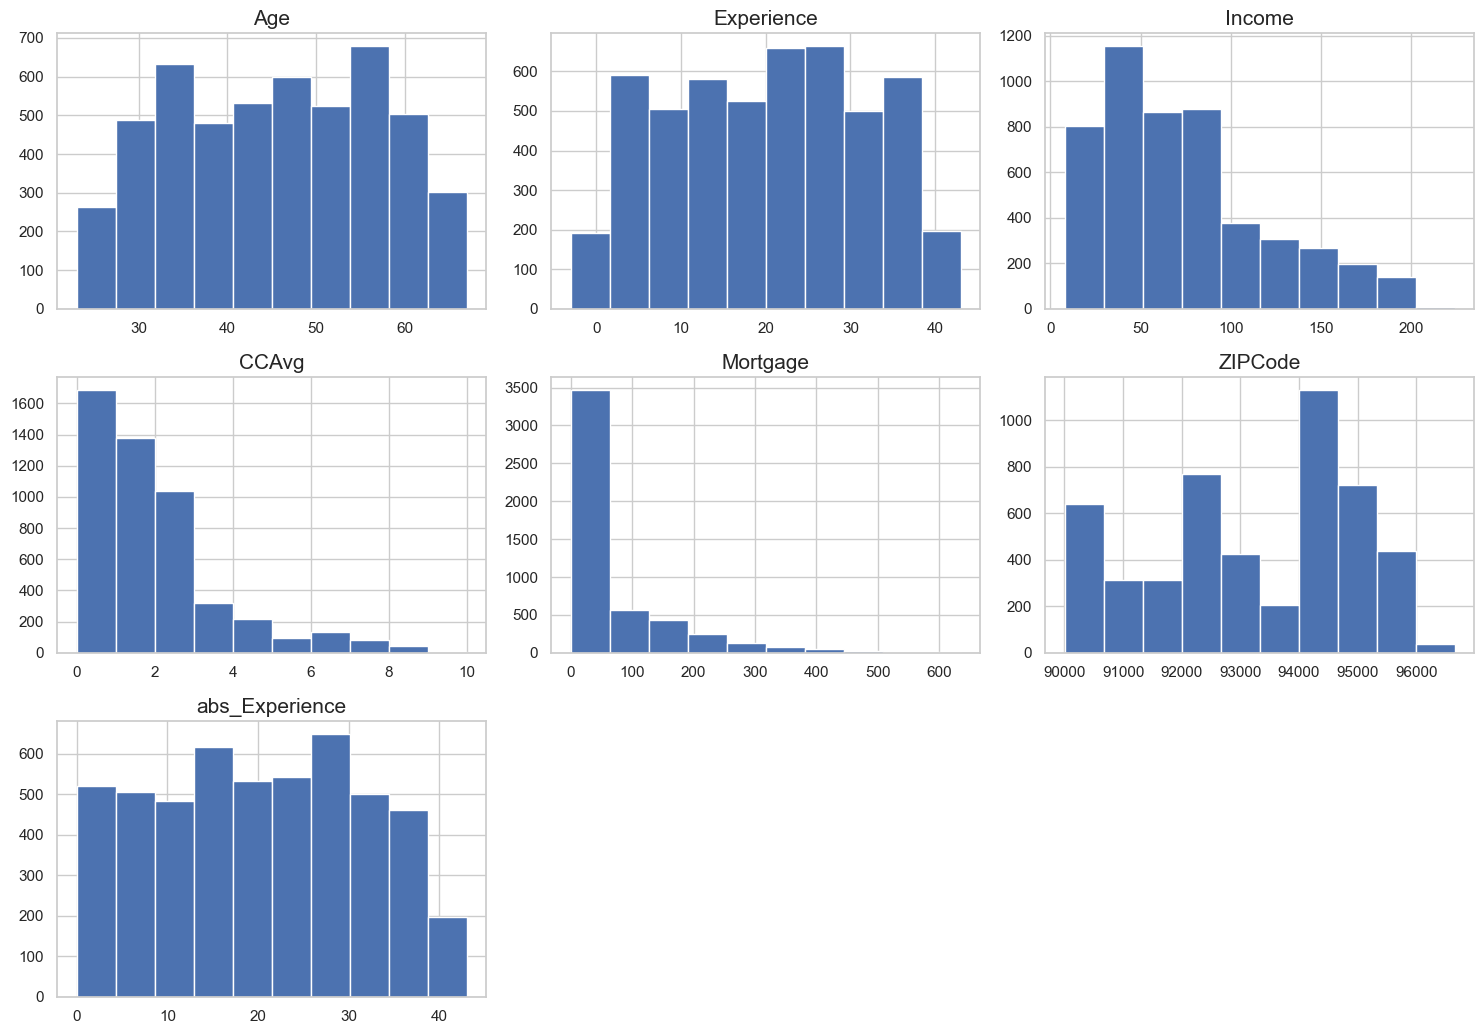

In [238]:
# lets plot histogram of all plots
features = ['Age', 'Experience', 'Income',
            'CCAvg', 'Mortgage', 'ZIPCode',
            'abs_Experience']

n_rows = math.ceil(len(features)/3)
plt.figure(figsize=(15, n_rows*3.5))
for i, feature in enumerate(list(features)):
    plt.subplot(n_rows, 3, i+1)
    plt.hist(data[feature])
    plt.tight_layout()
    plt.title(feature, fontsize=15);

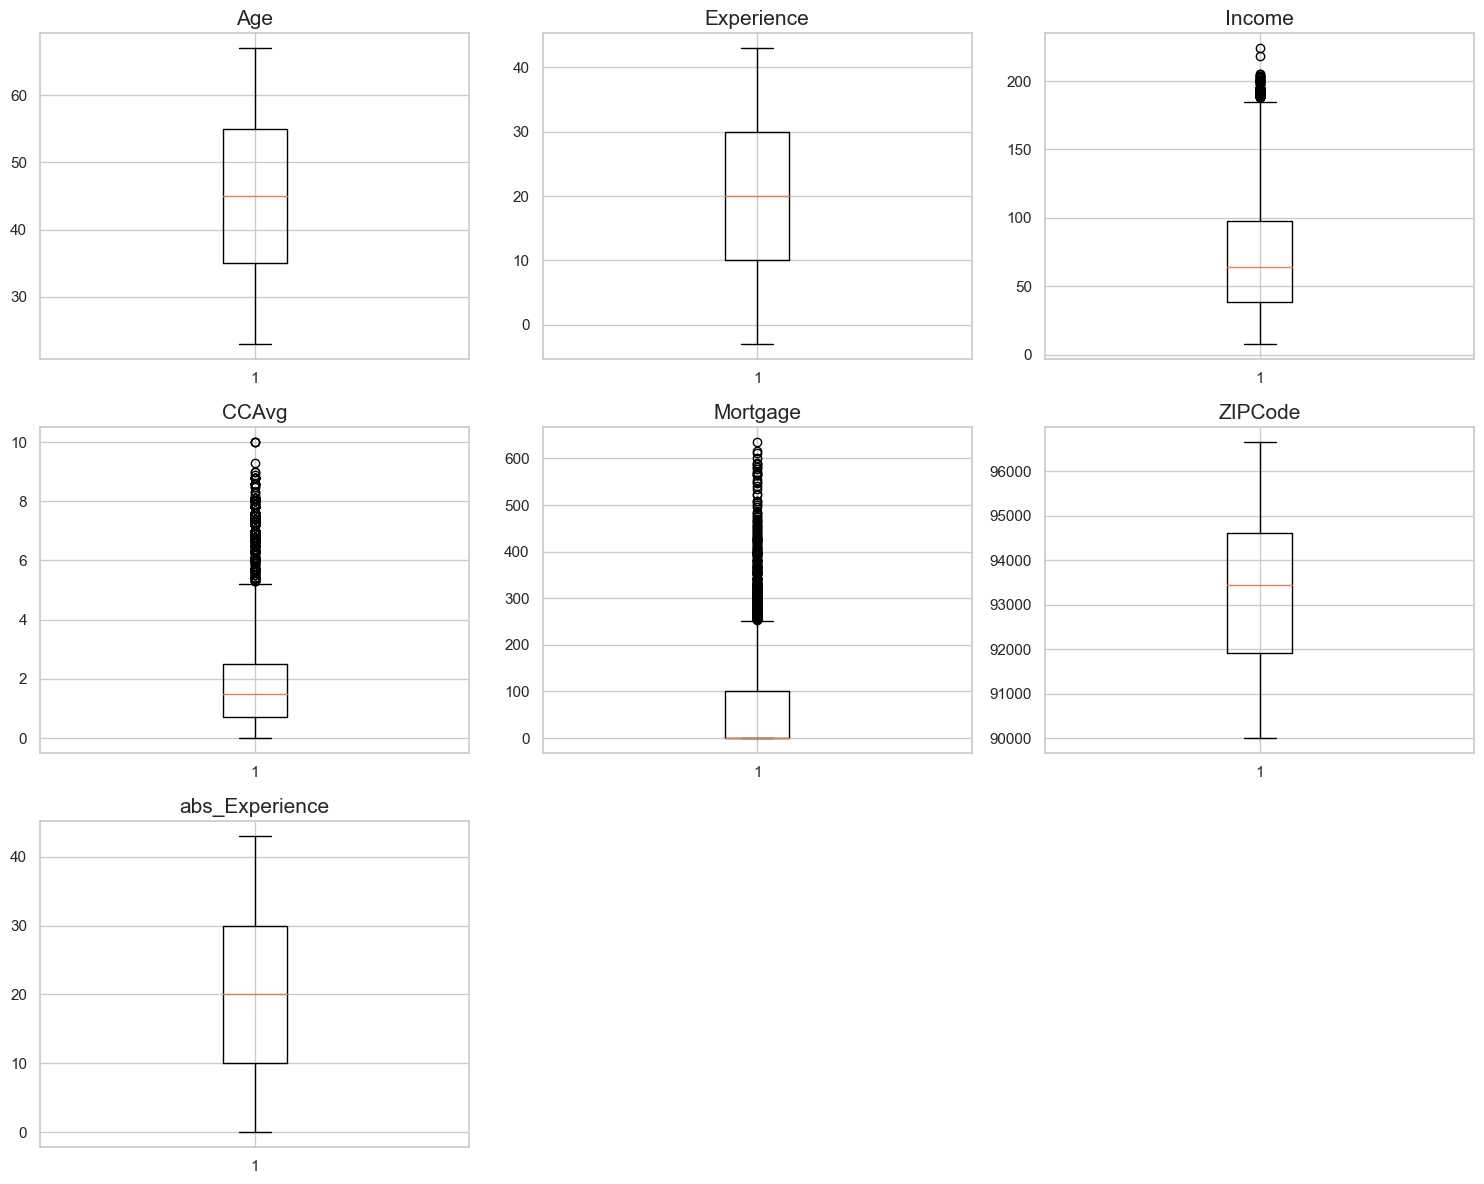

In [239]:
# outlier detection using boxplot
plt.figure(figsize=(15, n_rows*4))
for i, feature in enumerate(features):
    plt.subplot(n_rows, 3, i+1)
    plt.boxplot(data[feature], whis=1.5)
    plt.tight_layout()
    plt.title(feature, fontsize=15);

In [240]:
# looking at value counts for non-numeric features
num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in data.dtypes[data.dtypes=='category'].index:
    val_counts = data[colname].value_counts(dropna=False)  # i want to see NA counts
    print(f"Column: {colname}")
    print("="*40)
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("\n") # just for more space between 

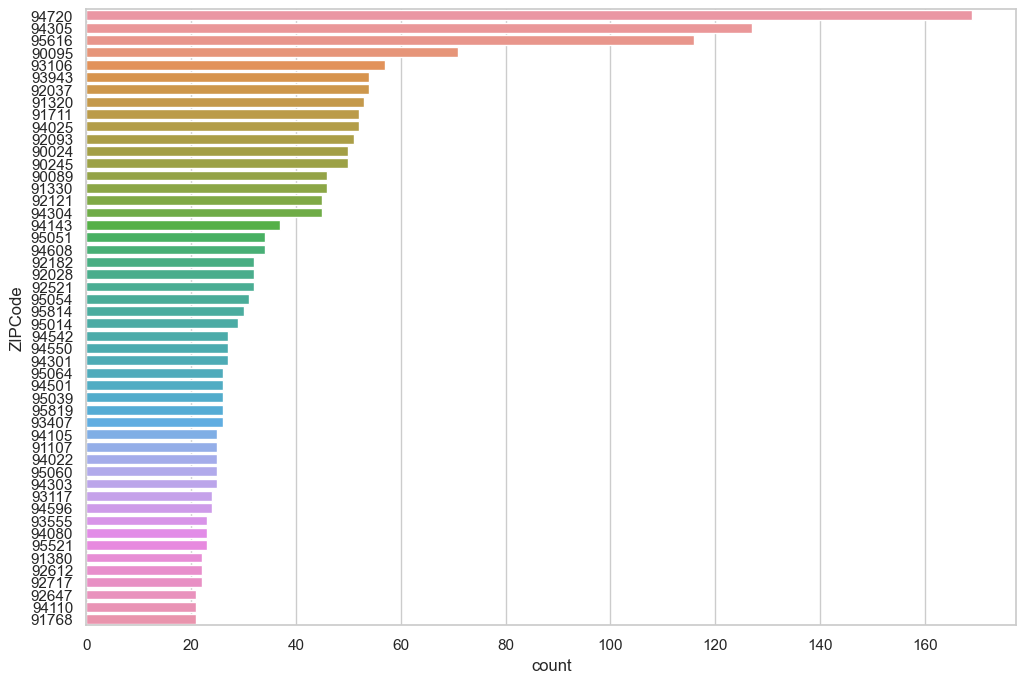

In [241]:
# Visualizing zipcode
plt.figure(figsize=(12, 8))
sns.countplot(y="ZIPCode", data=data, order=data.ZIPCode.value_counts().index[0:50]);

- This shows that most of the values come from the zipcode 94720 with over 160.

<Axes: xlabel='Education', ylabel='Density'>

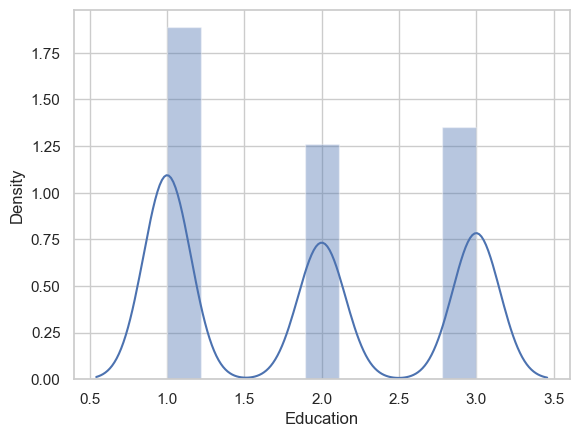

In [242]:
sns.distplot(data['Education'])

- Undergrad level customers are more than the Graduate and Advanced/Professional customers.

<Axes: xlabel='Family', ylabel='Count'>

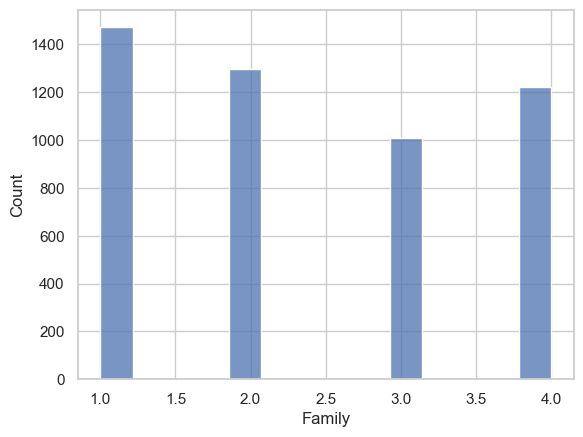

In [243]:
sns.histplot(data['Family'])

-The largest category of the family column is 1.
- The second largest category of the family column is a size of 2, then 4. 
- the smallest portion is size 3 in our dataset.

##### Visualization on personal loan

In [244]:
loan_counts = pd.DataFrame(data["Personal_Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal_Loan"]
loan_counts

,Labels,Personal_Loan
0,0,4520
1,1,480


- from the data points of 5000, 4520 are labeled as 0 shows who did not take loan and 480 as 1, those who took accept loan.

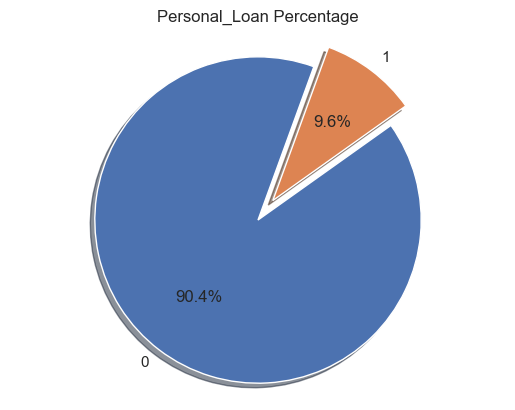

In [245]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_counts["Personal_Loan"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title("Personal_Loan Percentage")
plt.show()

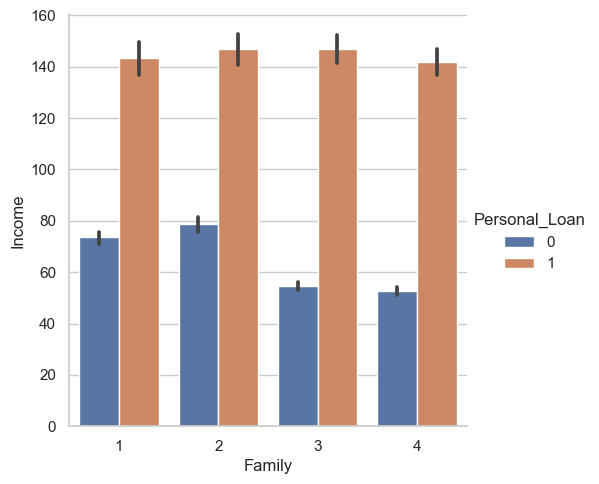

In [246]:
sns.catplot(x='Family', y='Income', hue='Personal_Loan', data = data, kind='bar')

- Customers who have family size 3 or greater with higher income between 100k to 200k are more likely to take loan.

<Axes: xlabel='Education', ylabel='Income'>

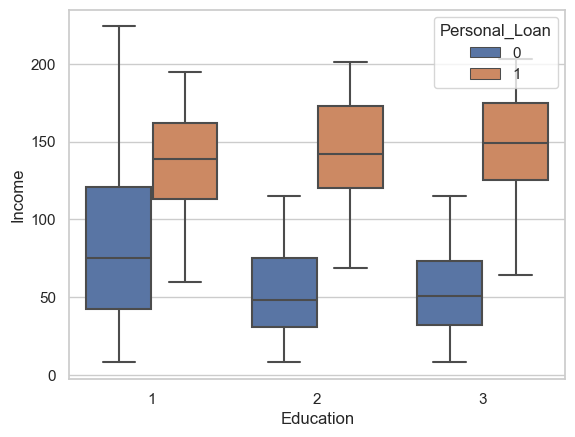

In [247]:
sns.boxplot(x='Education', y='Income', hue='Personal_Loan', data = data)

- customers with undergraduate level of education and family greater than 3 are good customers who took loan. Customer who took loan have same income range irrespective of education level. Graduate and above have more chance to take loan.

<Axes: xlabel='Education', ylabel='Mortgage'>

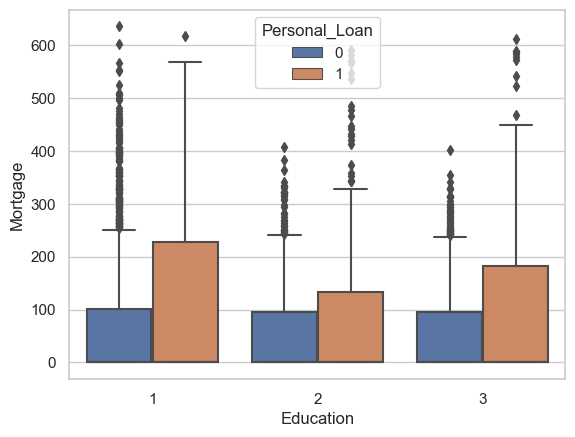

In [248]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal_Loan", data=data)

- customers whose education level is 1 and did not take loan has higher mortgage than customers who took loan of same education level. Customers whose education level is 2and 3 and did not take loan has lesser mortgage than customers who take loan of same education level.

<Axes: xlabel='Securities_Account', ylabel='count'>

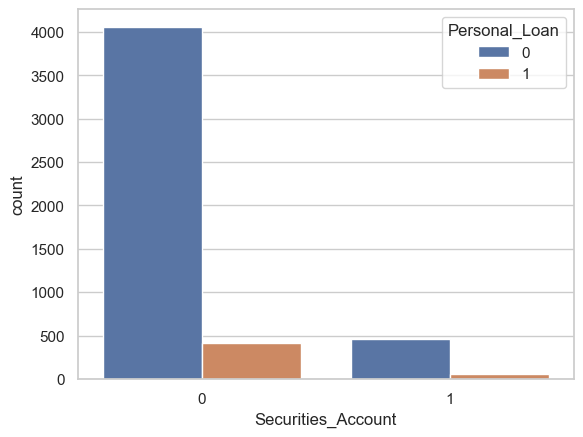

In [249]:
sns.countplot(x="Securities_Account", data=data, hue="Personal_Loan")

-  it shows customers with securities account are more likly to accept loan. While majority of customers who does not have loan do not have securities account.

<Axes: xlabel='Family', ylabel='count'>

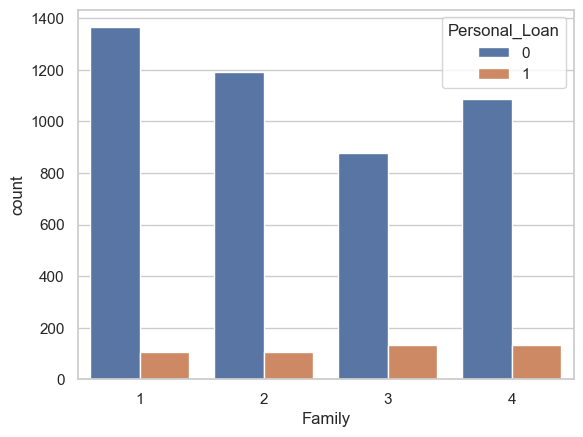

In [250]:
sns.countplot(x='Family',data=data,hue='Personal_Loan')

- Family size of 3 and 4 are tends to take loan

<Axes: xlabel='CD_Account', ylabel='count'>

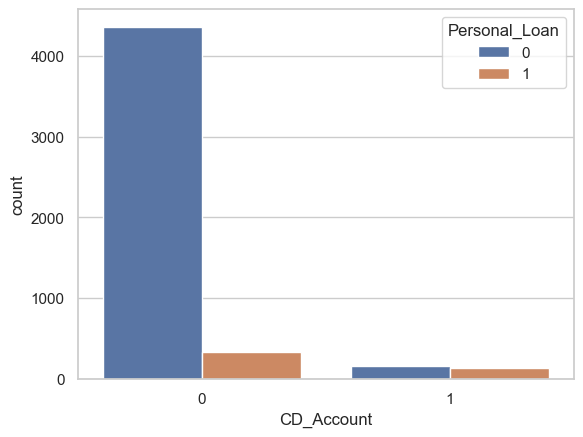

In [251]:
sns.countplot(x='CD_Account',data=data, hue='Personal_Loan')



- Most customers who does not have CD account , does not have loan.

<Axes: xlabel='CreditCard', ylabel='CCAvg'>

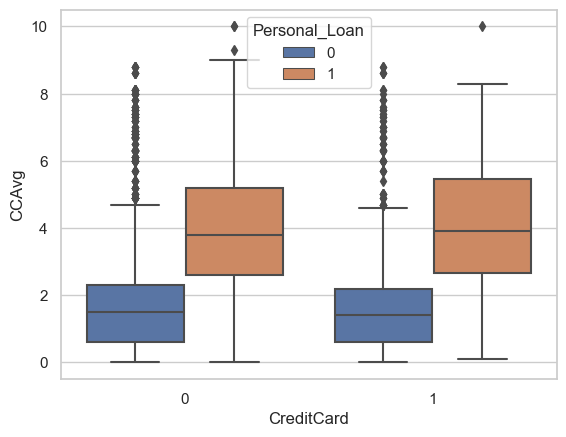

In [252]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal_Loan", data=data)

-  customers who have credit card with high monthly spending are more likly to take loan.

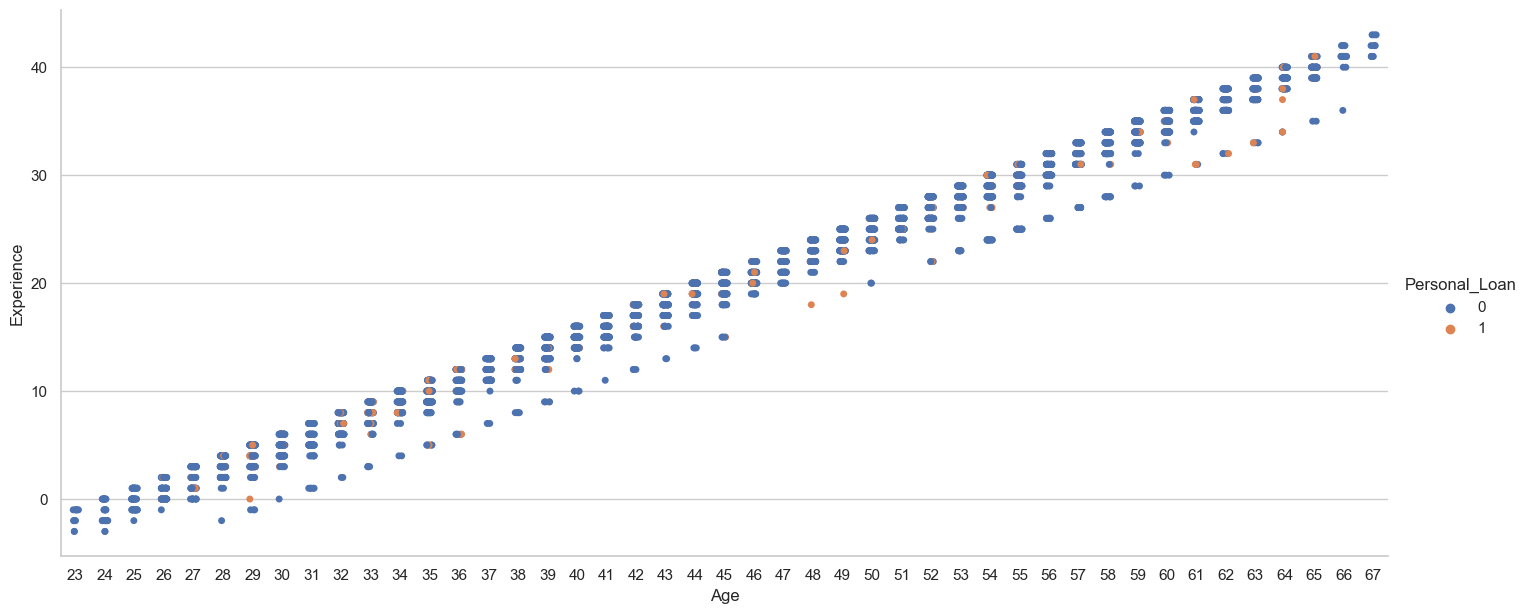

In [253]:
sns.catplot(x='Age', y='Experience', hue='Personal_Loan', data = data, height=6.30, aspect=9/4)

- Age and Experience is highly correlated. As Age increases, Experiences also increases

Text(0.5, 1.0, 'CCAvg Distribution')

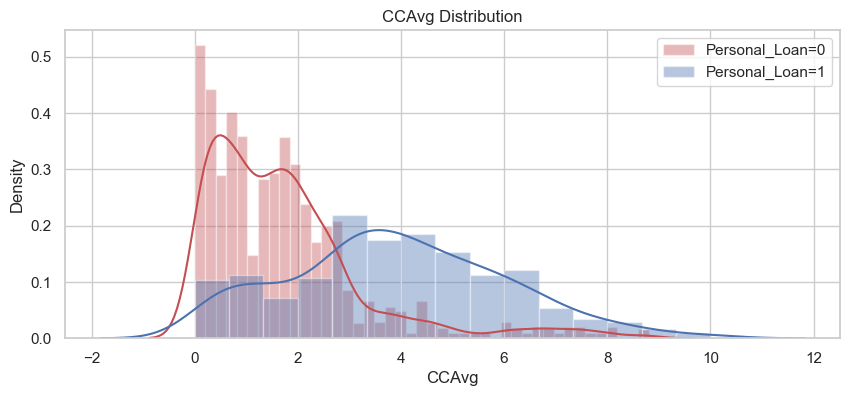

In [254]:
plt.figure(figsize=(10,4))
sns.distplot(data[data["Personal_Loan"] == 0]['CCAvg'], color = 'r',label='Personal_Loan=0')
sns.distplot(data[data["Personal_Loan"] == 1]['CCAvg'], color = 'b',label='Personal_Loan=1')
plt.legend()
plt.title("CCAvg Distribution")

- Customers who have taken personal loan have higher credit card average than those who did not take loan.

In [255]:
print('Credit card spending of Non-Loan customers: ',data[data['Personal_Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', data[data['Personal_Loan'] == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


- This shows persons who have personal loan has a higher credit card average. Average credit card spending with a median of 3800 and indicates a higher chances of the personal loa

Text(0.5, 1.0, 'Income Distribution')

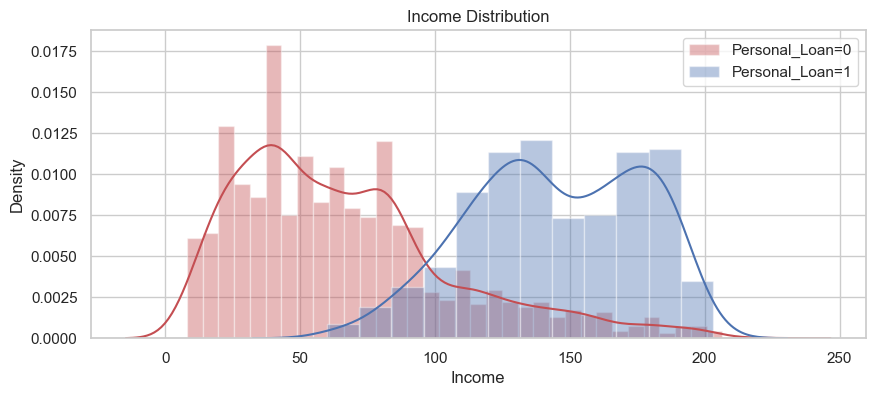

In [256]:
plt.figure(figsize=(10,4))
sns.distplot(data[data["Personal_Loan"] == 0]['Income'], color = 'r',label='Personal_Loan=0')
sns.distplot(data[data["Personal_Loan"] == 1]['Income'], color = 'b',label='Personal_Loan=1')
plt.legend()
plt.title("Income Distribution")

- Customers who have taken personal loan have income than those who did not accept personal loan.

##### Outliers Detection

<Axes: >

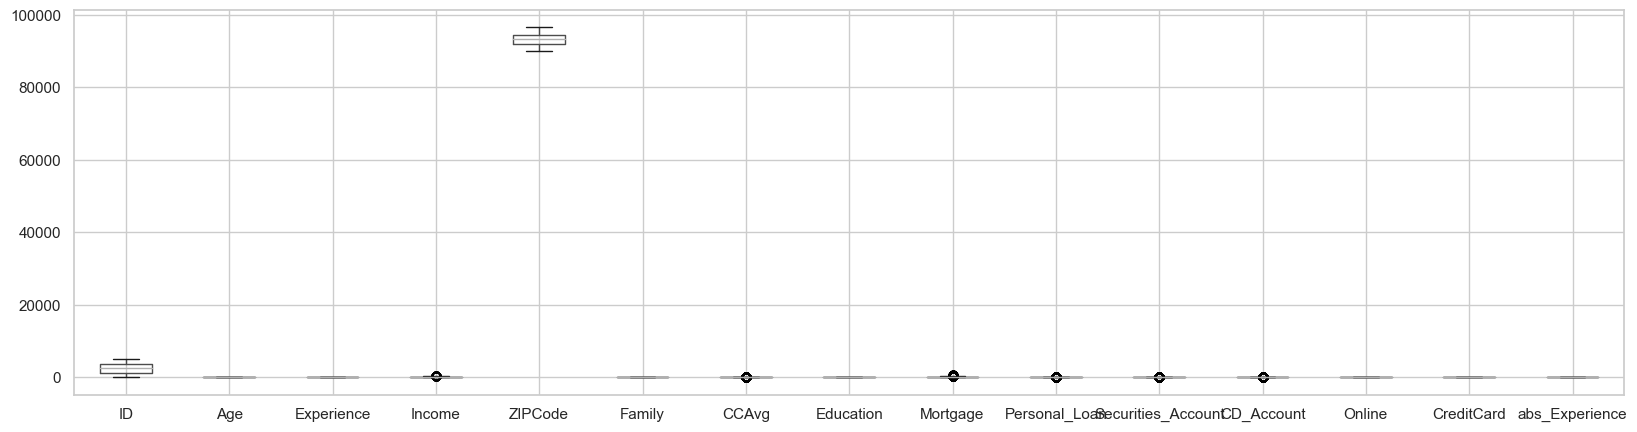

In [257]:
data.boxplot(return_type='axes', figsize=(20,5))

- There are few outliers

#### Heatmap Analysis

<Axes: title={'center': 'Correlation of Attributes'}>

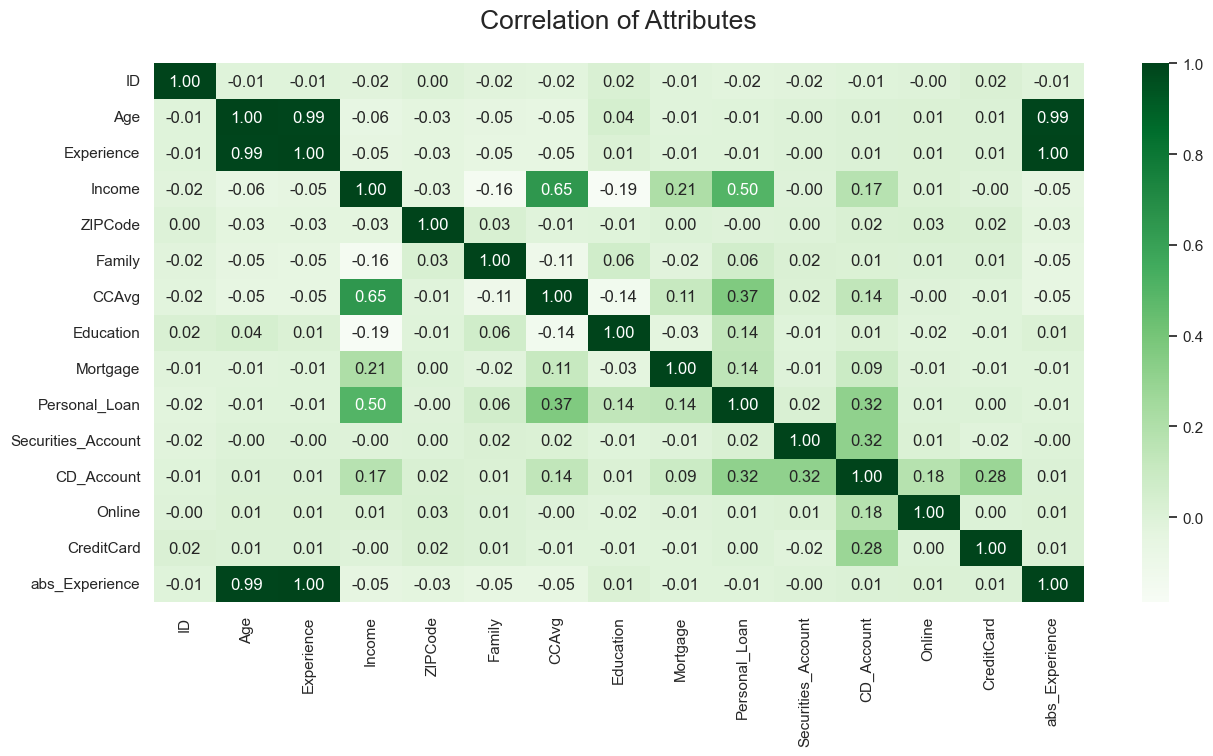

In [258]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(data.corr(), cmap='Greens',annot=True, fmt='.2f')

- Age and Experience are highly correlated.
- 'Income' and 'CCAvg' has a moderate correlation.
- Personal Loan has high correlation with 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.
- there is a relationship of 'CD Account' with 'Credit Card', 'Securities Account', 'Online', 'CCAvg' and 'Income'.
- 'Mortgage' is moderately correlated with 'Income' which is about 21%.
- 'Income' has an influence 'CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'.

### Model Building

In [259]:
try:
    data.drop(['Experience'], axis=1, inplace=True)
except KeyError:
    print(f"Column Experience must already be dropped.")
data.head()

,ID,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,abs_Experience
0,1,25,49,91107,4,1.6,1,0,0,1,0,0,0,1
1,2,45,34,90089,3,1.5,1,0,0,1,0,0,0,19
2,3,39,11,94720,1,1.0,1,0,0,0,0,0,0,15
3,4,35,100,94112,1,2.7,2,0,0,0,0,0,0,9
4,5,35,45,91330,4,1.0,2,0,0,0,0,0,1,8


In [260]:
data_dummies = pd.get_dummies(data, columns=['Education', 'Family'], drop_first=True)
data_dummies.head()


,ID,Age,Income,ZIPCode,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,abs_Experience,Education_2,Education_3,Family_2,Family_3,Family_4
0,1,25,49,91107,1.6,0,0,1,0,0,0,1,0,0,0,0,1
1,2,45,34,90089,1.5,0,0,1,0,0,0,19,0,0,0,1,0
2,3,39,11,94720,1.0,0,0,0,0,0,0,15,0,0,0,0,0
3,4,35,100,94112,2.7,0,0,0,0,0,0,9,1,0,0,0,0
4,5,35,45,91330,1.0,0,0,0,0,0,1,8,1,0,0,0,1


In [261]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Mortgage            5000 non-null   int64  
 6   Personal_Loan       5000 non-null   int64  
 7   Securities_Account  5000 non-null   int64  
 8   CD_Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
 11  abs_Experience      5000 non-null   int64  
 12  Education_2         5000 non-null   uint8  
 13  Education_3         5000 non-null   uint8  
 14  Family_2            5000 non-null   uint8  
 15  Family_3            5000 non-null   uint8  
 16  Family

#### Splitting Data


In [262]:
X = data_dummies.drop(['Personal_Loan'], axis=1)
X.head(10)

,ID,Age,Income,ZIPCode,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,abs_Experience,Education_2,Education_3,Family_2,Family_3,Family_4
0,1,25,49,91107,1.6,0,1,0,0,0,1,0,0,0,0,1
1,2,45,34,90089,1.5,0,1,0,0,0,19,0,0,0,1,0
2,3,39,11,94720,1.0,0,0,0,0,0,15,0,0,0,0,0
3,4,35,100,94112,2.7,0,0,0,0,0,9,1,0,0,0,0
4,5,35,45,91330,1.0,0,0,0,0,1,8,1,0,0,0,1
5,6,37,29,92121,0.4,155,0,0,1,0,13,1,0,0,0,1
6,7,53,72,91711,1.5,0,0,0,1,0,27,1,0,1,0,0
7,8,50,22,93943,0.3,0,0,0,0,1,24,0,1,0,0,0
8,9,35,81,90089,0.6,104,0,0,1,0,10,1,0,0,1,0
9,10,34,180,93023,8.9,0,0,0,0,0,9,0,1,0,0,0


In [263]:
y = data_dummies['Personal_Loan']
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: Personal_Loan, dtype: int64

In [264]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("The shape of X_train: ", X_train.shape)
print("The shape of X_test: ", X_test.shape)

The shape of X_train:  (3500, 16)
The shape of X_test:  (1500, 16)


##### Build Model using Decision Tree 

In [265]:
model = DecisionTreeClassifier(criterion='gini', 
                               class_weight={0:0.20, 1:0.80}, 
                               random_state=1)

In [266]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

In [267]:
# Function to create confusion matrix
def make_confusion_matrix(model,  y_actual, labels=[1, 0], xtest=X_test):
    """
    model : classifier to predict values of X
    y_actual : ground truth  
    """
    y_predict = model.predict(xtest)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index=["Actual - No","Actual - Yes"], 
                         columns=['Predicted - No','Predicted - Yes'])
    #print(df_cm)
    #print("="*80)
    
    group_counts = [f"{value:0.0f}" for value in cm.flatten()]   
    group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
    
    labels = [f"{gc}\n{gp}" for gc, gp in zip(group_counts, group_percentages)]  
    labels = np.asarray(labels).reshape(2,2)
    
    plt.figure(figsize = (5, 3))
    sns.heatmap(df_cm, annot=labels, fmt='')
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12);

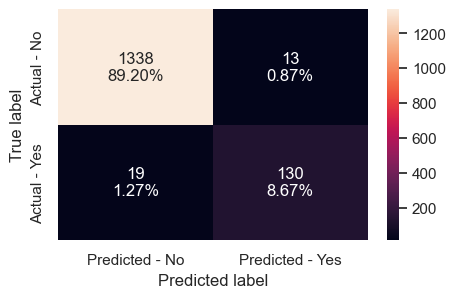

In [268]:
make_confusion_matrix(model, y_test)

In [269]:
y_train.value_counts(normalize=True)

0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

- True Positive is 130, the model predicted correctly.
- True Negative is 1341

In [270]:
#  Function to calculate recall score
def get_recall_score(model):
    '''
    Prints the recall score from model
    model : classifier to predict values of X
    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
    print("Recall on test set : ", metrics.recall_score(y_test, pred_test))

##### Recall score from baseline model.

In [271]:
# Recall on train and test
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.87248322147651


##### Visualizing the decision tree from baseline model


In [272]:
feature_names = list(X.columns)
print(feature_names)

['ID', 'Age', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'abs_Experience', 'Education_2', 'Education_3', 'Family_2', 'Family_3', 'Family_4']


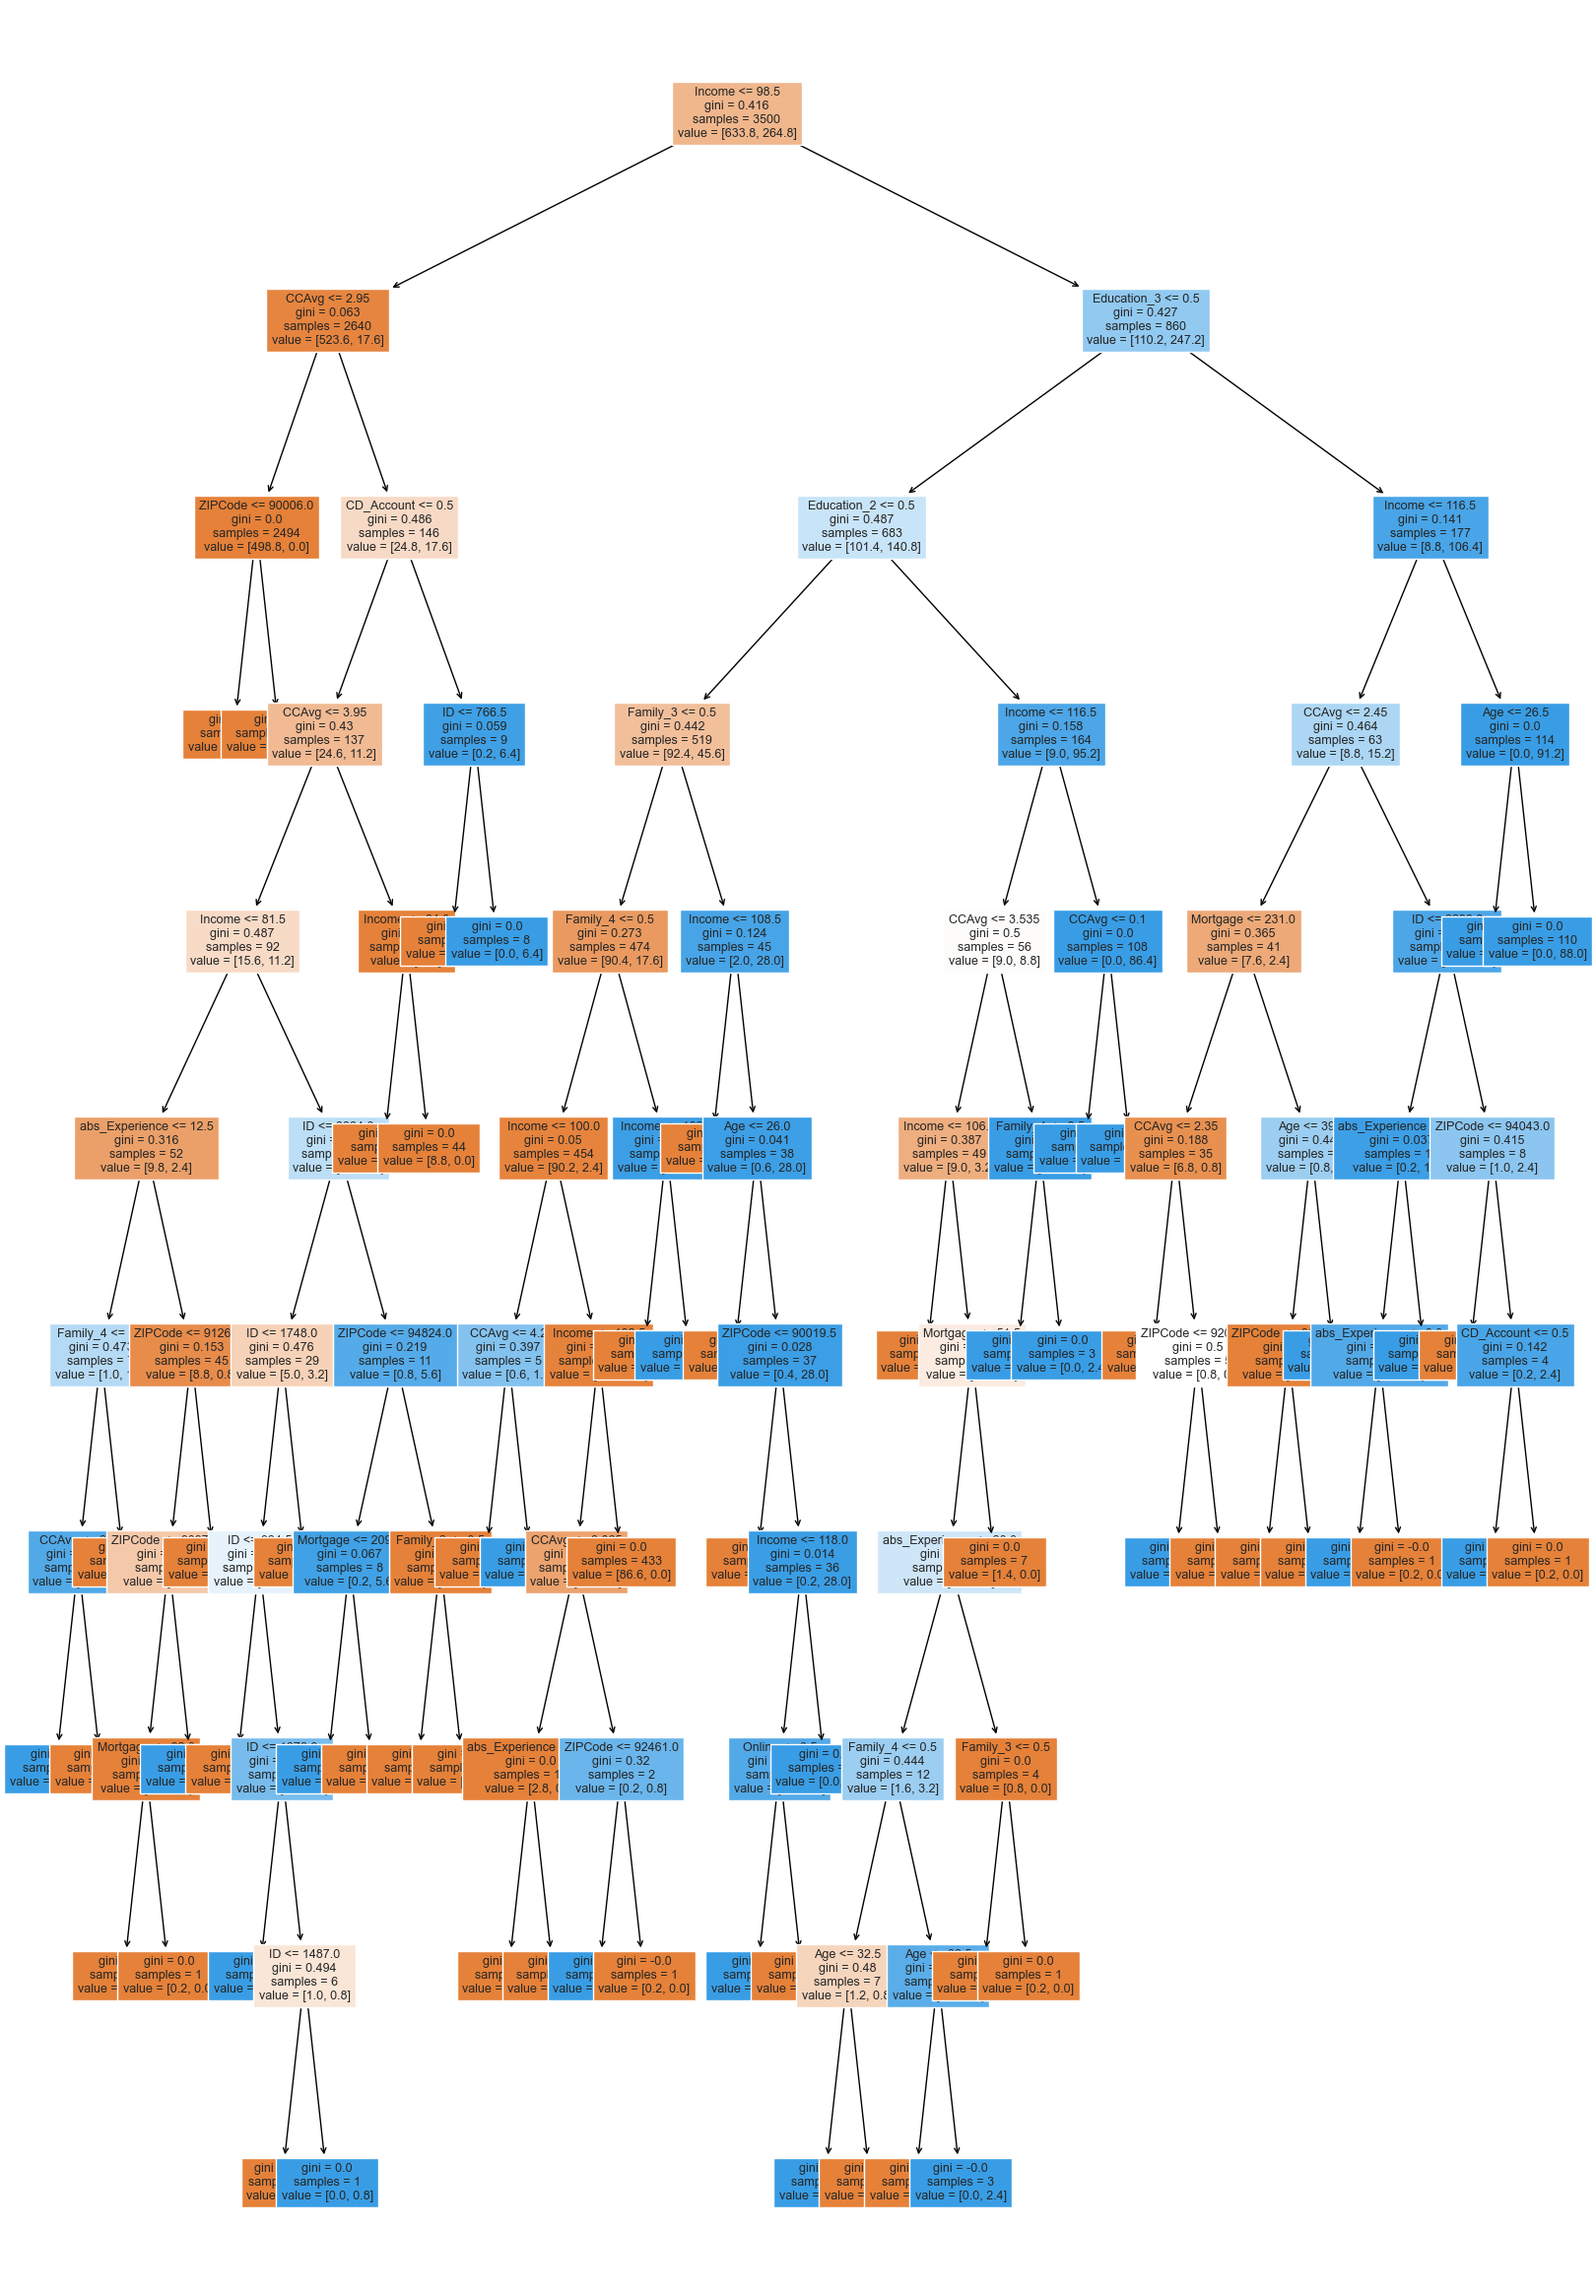

In [273]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(model,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=9,
                     node_ids=False,
                     class_names=None,)

#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [274]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- ZIPCode <= 90006.00
|   |   |   |--- weights: [0.80, 0.00] class: 0
|   |   |--- ZIPCode >  90006.00
|   |   |   |--- weights: [498.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- abs_Experience <= 12.50
|   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.60] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.20, 0.00] class: 0
|   |   |   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.80, 0.00] class: 0
|   |   |   |   |   |--- abs_Experience >  12.50
|   |   |   |   |   |   |--- ZIPCode <= 91269.00
|   |   |   |   |   |   |   |--- ZIPCode <= 90974.00
|   |   |   |   |   |   |   |   |--- Mortgage <= 92.00
|   |   |   |   |   |   |   

##### Feature importance from baseline model

In [275]:
def importance_plot(model):
    """
    Displays feature importance barplot
    model: decision tree classifier
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)
    size = len(indices)//2 # to help scale the plot.
    
    plt.figure(figsize=(8, size))
    plt.title("Feature Importances", fontsize=10)
    plt.barh(range(len(indices)), importances[indices], color='green', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance", fontsize=12);

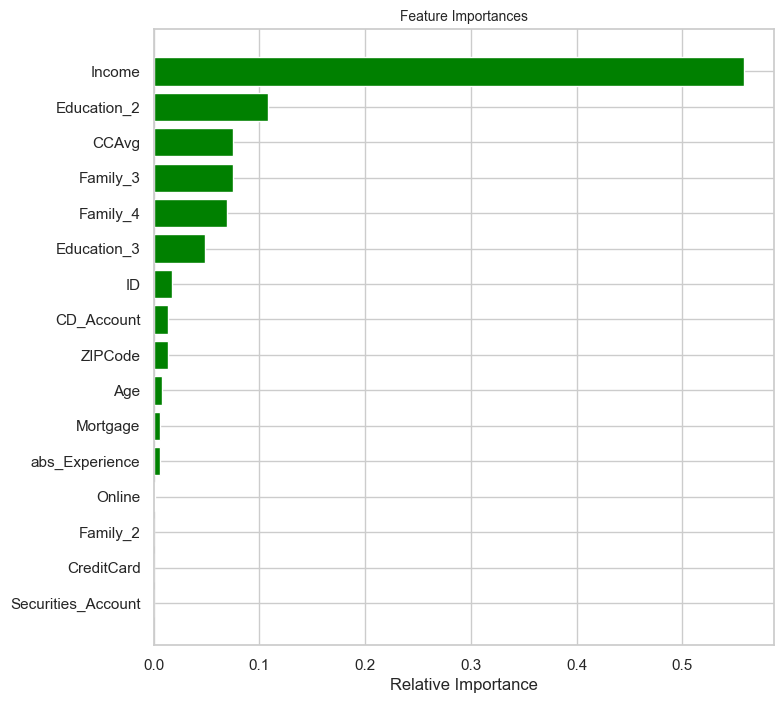

In [276]:
importance_plot(model=model)

In [277]:
# importance of features in the tree building. Also known as the Gini importance
    
pd.DataFrame(model.feature_importances_, 
                   columns=["Imp"], 
                   index=X_train.columns).sort_values(by='Imp', ascending=False)


,Imp
Income,5.586267e-01
Education_2,1.081168e-01
CCAvg,7.524002e-02
Family_3,7.460385e-02
Family_4,6.895201e-02
Education_3,4.896824e-02
ID,1.705246e-02
CD_Account,1.386168e-02
ZIPCode,1.347808e-02
Age,8.294955e-03


##### Using GridSearch for hyperparameter tuning of our tree model.

In [278]:

# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1, class_weight={0:.15,1:.85})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(1,10),
              'criterion': ['entropy','gini'],
              'splitter': ['best','random'],
              'min_impurity_decrease': [0.000001,0.00001,0.0001],
              'max_features': ['log2','sqrt']}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, param_grid=parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=3,
                       max_features='log2', min_impurity_decrease=1e-06,
                       random_state=1)

##### Confusion matrix using GridSearchCV




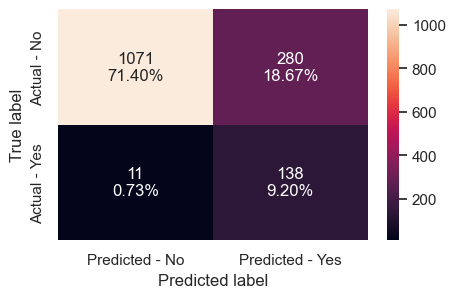

In [279]:
make_confusion_matrix(estimator, y_test)

##### Recall score using GridSearchCV

In [280]:
get_recall_score(estimator)

Recall on training set :  0.9818731117824774
Recall on test set :  0.9261744966442953


##### Visualizing the decision tree from the best fit estimator using GridSearchCV

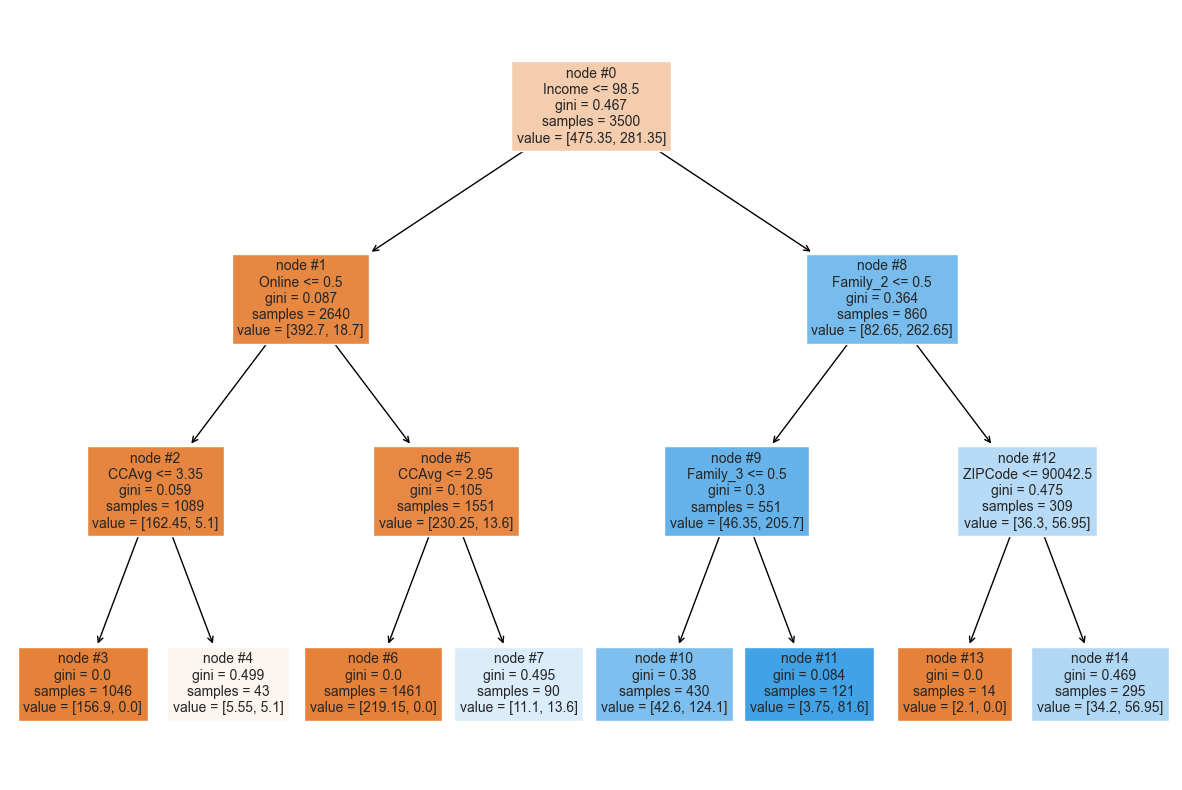

In [281]:

plt.figure(figsize=(15, 10))
out = tree.plot_tree(estimator,
                     feature_names=feature_names,
                     filled=True,
                     fontsize=10,
                     node_ids=True,
                     class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()


In [282]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator,
                       feature_names=feature_names,
                       show_weights=True))

|--- Income <= 98.50
|   |--- Online <= 0.50
|   |   |--- CCAvg <= 3.35
|   |   |   |--- weights: [156.90, 0.00] class: 0
|   |   |--- CCAvg >  3.35
|   |   |   |--- weights: [5.55, 5.10] class: 0
|   |--- Online >  0.50
|   |   |--- CCAvg <= 2.95
|   |   |   |--- weights: [219.15, 0.00] class: 0
|   |   |--- CCAvg >  2.95
|   |   |   |--- weights: [11.10, 13.60] class: 1
|--- Income >  98.50
|   |--- Family_2 <= 0.50
|   |   |--- Family_3 <= 0.50
|   |   |   |--- weights: [42.60, 124.10] class: 1
|   |   |--- Family_3 >  0.50
|   |   |   |--- weights: [3.75, 81.60] class: 1
|   |--- Family_2 >  0.50
|   |   |--- ZIPCode <= 90042.50
|   |   |   |--- weights: [2.10, 0.00] class: 0
|   |   |--- ZIPCode >  90042.50
|   |   |   |--- weights: [34.20, 56.95] class: 1



##### Feature importance using GridSearchCV

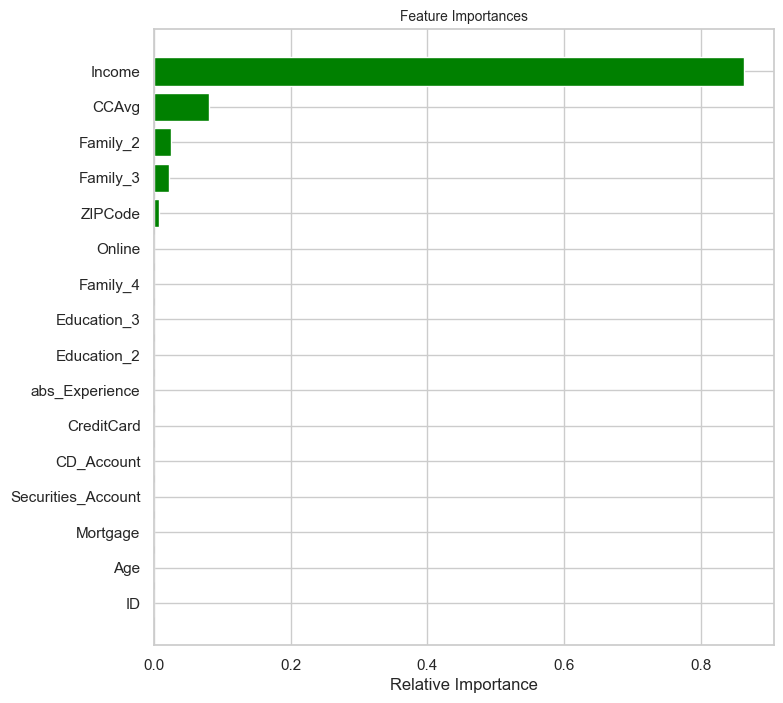

In [283]:
# importance of features in the tree building. Also known as the Gini importance
pd.DataFrame(estimator.feature_importances_, 
             columns=["Imp"],
             index=X_train.columns).sort_values(by='Imp', ascending=False)
# importance of features has increaseS
importance_plot(model=estimator)

##### Conclusion
- Different techniques and also a Decision Tree Classifier is build a predictive model. The model helps predict if a customer is liable to accept a personal loan or not.
- Income, education, family, and credit card usage are the most important features used in predicting liable loan customers.


##### Recommendation
- income is the most important feature as deduced from the decision tree. Customer whose yearly income is less than 98.5k has a higher tenddency of not having a personal loan